In [266]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import os

FILE = "70283.json"

lineup_path = os.path.join("..\\open-data\\data\\lineups", FILE)
events_path = os.path.join("..\\open-data\\data\\events", FILE)

with open(events_path, encoding="utf-8") as json_file:
    events = json.load(json_file)

with open(lineup_path, encoding="utf-8") as json_file:
    lineup = json.load(json_file)
    
composition = events[:2]

In [267]:
LABELS = ['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type', 'possession', 'possession_team', 'play_pattern', 'off_camera', 'team', 'player', 'position', 'location', 'duration', 'under_pressure', 'related_events', 'pass']

In [344]:
def refine(dic) -> list:
    res = []
    for label in LABELS:
        if label in dic.keys():
            res.append(dic[label])
        else:
            res.append(None)
    return res

def clean_list(events) -> list:
    ##### USE THIS #####
    res = []
    for e in events[2:]:
        res.append(refine(e))
    return res

def clean_df(df):
    columns=["type", "possession_team", "play_pattern", "team", "player", "position"]
    for c in columns:
        df[c] = df[c].apply(lambda x : None if x is None else x["name"] )
        
        
def create_data_pass(passes): 
    columns = ["recipient", "length", "angle", "height", "end_location", "type", "body_part"]
    for c in columns:
        def func(x):
            if x is None:
                return None
            else:
                if c in x.keys():
                    return x[c]
                else:
                    return None
        passes[c] = passes["pass"].apply(lambda x : func(x))
    
    need_refine = ["recipient", "height", "type", "body_part"]
    for c in need_refine:
        passes[c] = passes[c].apply(lambda x : None if x is None else x["name"])
    passes = passes.drop(columns=["pass", "related_events"])
    return passes

def get_avg_pos(df, player):
    interest = df.loc[(df["player"] == player) | (df["recipient"] == player)]
    
    return interest
    


In [342]:
df = pd.DataFrame(clean_list(events), columns=LABELS)
clean_df(df)

df.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,off_camera,team,player,position,location,duration,under_pressure,related_events,pass
0,93366884-a08a-4b7a-8990-a8595a9bd152,3,1,00:00:00.000,0,0,Half Start,1,Barcelona,Regular Play,None,Espanyol,None,None,None,0.000000,None,[d9aa10a4-d7d9-4c59-8c38-ab15ccb9021c],None
1,d9aa10a4-d7d9-4c59-8c38-ab15ccb9021c,4,1,00:00:00.000,0,0,Half Start,1,Barcelona,Regular Play,None,Barcelona,None,None,None,0.000000,None,[93366884-a08a-4b7a-8990-a8595a9bd152],None
2,39aaebf4-b82f-4b0b-bd00-351b6e4d474b,5,1,00:00:00.080,0,0,Pass,2,Espanyol,From Kick Off,None,Espanyol,Abraham González Casanova,Right Center Midfield,"[61.0, 41.0]",0.550375,None,[57cec7b1-75eb-4162-9f33-6de769653f61],"{'recipient': {'id': 6767, 'name': 'Sergio Gar..."
3,57cec7b1-75eb-4162-9f33-6de769653f61,6,1,00:00:00.630,0,0,Ball Receipt*,2,Espanyol,From Kick Off,None,Espanyol,Sergio García De La Fuente,Center Forward,"[59.7, 38.4]",NaN,None,[39aaebf4-b82f-4b0b-bd00-351b6e4d474b],None
4,9719dc79-1e87-46ae-8f4e-b46a58fa3618,7,1,00:00:00.630,0,0,Carry,2,Espanyol,From Kick Off,None,Espanyol,Sergio García De La Fuente,Center Forward,"[59.7, 38.4]",2.784325,None,"[57cec7b1-75eb-4162-9f33-6de769653f61, 7150acc...",None


In [341]:
df.play_pattern.unique()

array(['Regular Play', 'From Kick Off', 'From Throw In', 'From Free Kick',
       'From Corner', 'From Keeper', 'From Goal Kick', 'From Counter'],
      dtype=object)

In [292]:
passes = df.loc[df["type"] == "Pass"].copy()
passes = create_data_pass(passes)

passes.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,under_pressure,recipient,length,angle,height,end_location,body_part
2,39aaebf4-b82f-4b0b-bd00-351b6e4d474b,5,1,00:00:00.080,0,0,Kick Off,2,Espanyol,From Kick Off,...,Right Center Midfield,"[61.0, 41.0]",0.550375,None,Sergio García De La Fuente,2.906888,-2.034444,Ground Pass,"[59.7, 38.4]",Right Foot
5,7150accf-a74e-47bd-94b5-c8b814a8e259,8,1,00:00:03.414,0,3,None,2,Espanyol,From Kick Off,...,Center Forward,"[66.9, 47.2]",1.876600,None,Thievy Guivane Bifouma Koulossa,25.747232,1.271155,Ground Pass,"[74.5, 71.8]",Right Foot
11,01f06454-1bc9-457e-96e8-dfa8c9d05495,14,1,00:00:27.675,0,27,Throw-in,3,Espanyol,From Throw In,...,Right Back,"[85.0, 80.0]",0.932800,None,Abraham González Casanova,10.196568,-1.433060,Low Pass,"[86.4, 69.9]",None
13,94558296-7f24-4edb-bf7a-c1df4b9b3bd4,16,1,00:00:28.608,0,28,None,3,Espanyol,From Throw In,...,Right Center Midfield,"[86.4, 69.9]",1.963000,None,None,21.371477,-0.524370,High Pass,"[104.9, 59.2]",Right Foot
14,65a7a7ac-9e53-4d47-b211-0371b80f7e96,17,1,00:00:30.571,0,30,Recovery,3,Espanyol,From Throw In,...,Right Center Back,"[16.1, 21.8]",2.305900,None,Neymar da Silva Santos Junior,27.106642,-0.022137,High Pass,"[43.2, 21.2]",Head


In [293]:
passes["player"].unique()

array(['Abraham González Casanova', 'Sergio García De La Fuente',
       'Raúl Rodríguez Navarro', 'Gerard Piqué Bernabéu',
       'David López Silva', 'Alexis Alejandro Sánchez Sánchez',
       'Lionel Andrés Messi Cuccittini', 'Daniel Alves da Silva',
       'Xavier Hernández Creus', 'Martín Montoya Torralbo',
       'Sergio Busquets i Burgos', 'Sidnei Rechel da Silva Júnior',
       'Thievy Guivane Bifouma Koulossa', 'Neymar da Silva Santos Junior',
       'Andrés Iniesta Luján', 'Javier Alejandro Mascherano',
       'Francisco Casilla Cortés', 'Héctor Alfredo Moreno Herrera',
       'Víctor Valdés Arribas', 'Víctor Sánchez Mata',
       'Juan Rafael Fuentes Hernández', 'Gabriel Andrei Torje',
       'Jhon Andrés Córdoba Copete', 'Manuel Lanzarote Bruno',
       'Francesc Fàbregas i Soler', 'Pedro Eliezer Rodríguez Ledesma',
       'Marc Bartra Aregall'], dtype=object)

In [338]:
player = passes.loc[passes["player"] == "Lionel Andrés Messi Cuccittini"].copy()

player.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,under_pressure,recipient,length,angle,height,end_location,body_part
23,cb8b45ef-bc16-450a-a2ec-f5103158bab1,26,1,00:00:36.399,0,36,None,4,Barcelona,Regular Play,...,Center Forward,"[47.4, 35.0]",3.243900,True,Daniel Alves da Silva,30.193542,1.710352,High Pass,"[43.2, 64.9]",Left Foot
53,c35975d2-00fa-4219-8b6a-075f7910b940,56,1,00:01:05.385,1,5,None,4,Barcelona,Regular Play,...,Center Forward,"[79.8, 69.3]",1.066800,None,Alexis Alejandro Sánchez Sánchez,8.464632,1.821505,Ground Pass,"[77.7, 77.5]",Left Foot
61,f2a57106-a60e-479b-8766-0408c730167a,64,1,00:01:09.231,1,9,None,4,Barcelona,Regular Play,...,Center Forward,"[70.9, 72.9]",1.056000,True,Andrés Iniesta Luján,27.029799,-0.704212,High Pass,"[91.5, 55.4]",Left Foot
128,45ca6a95-cf93-4176-9809-dd2267f59d54,131,1,00:02:39.557,2,39,None,8,Barcelona,From Corner,...,Center Forward,"[107.7, 73.1]",2.265600,None,None,36.641506,-1.455920,High Pass,"[111.9, 36.7]",Left Foot
268,68b86849-ee5a-4d6c-91e7-0667dfba91af,271,1,00:05:40.031,5,40,None,14,Barcelona,From Goal Kick,...,Center Forward,"[87.5, 54.6]",0.849273,True,Andrés Iniesta Luján,11.594827,-1.309083,Ground Pass,"[90.5, 43.4]",Right Foot


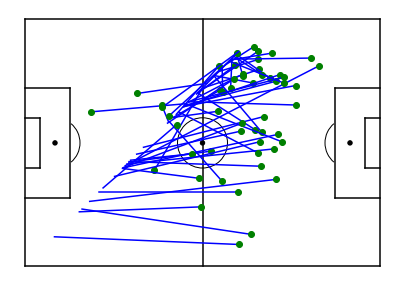

In [336]:
from matplotlib.patches import Arc

#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

for i in range(len(player)):
    start = player.iloc[i, 14]
    end = player.iloc[i, 21]
    plt.plot((start[0], end[1]), (start[1], end[1]), color="blue")
    
    plt.plot(start[0], start[1], "o", color="green")
    
plt.show()

In [346]:
get_avg_pos(df, "Lionel Andrés Messi Cuccittini")

KeyError: 'recipient'